## DECOM: INTELIGENCIA COMPUTACIONAL, Prof. Rogério; Marco Túlio S. da Mata; CEFET-MG

## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [2]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
# What is the corresponding label in the training set?
y_train[333]

8

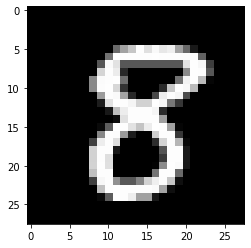

In [5]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [6]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [7]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [8]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [9]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [10]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [12]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 11s 16ms/step - loss: 0.5331 - accuracy: 0.8385 - val_loss: 0.2065 - val_accuracy: 0.9373
Epoch 2/30
469/469 [==============================] - 6s 14ms/step - loss: 0.2514 - accuracy: 0.9256 - val_loss: 0.1538 - val_accuracy: 0.9528
Epoch 3/30
469/469 [==============================] - 9s 20ms/step - loss: 0.1997 - accuracy: 0.9405 - val_loss: 0.1403 - val_accuracy: 0.9565
Epoch 4/30
469/469 [==============================] - 8s 18ms/step - loss: 0.1716 - accuracy: 0.9488 - val_loss: 0.1208 - val_accuracy: 0.9640
Epoch 5/30
469/469 [==============================] - 10s 20ms/step - loss: 0.1547 - accuracy: 0.9542 - val_loss: 0.1112 - val_accuracy: 0.9680
Epoch 6/30
469/469 [==============================] - 7s 15ms/step - loss: 0.1436 - accuracy: 0.9571 - val_loss: 0.1027 - val_accuracy: 0.9696
Epoch 7/30
469/469 [==============================] - 8s 16ms/step - loss: 0.1337 - accuracy: 0.9596 - val_loss: 0.0998 - val_accuracy: 0.96

In [14]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10473678261041641
Test accuracy: 0.974399983882904


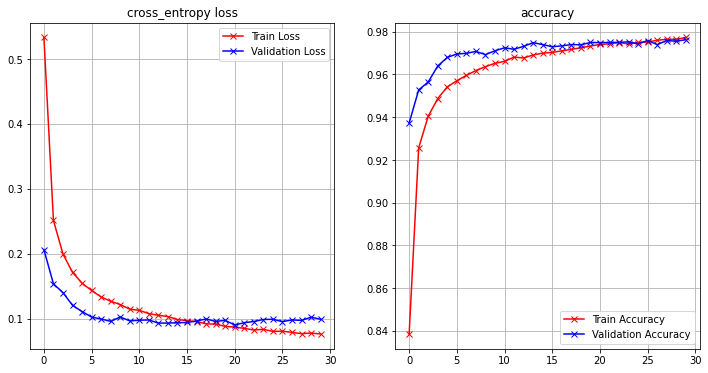

In [20]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [13]:
### Build your model here

model_2 = Sequential([
    Dense(400,  activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation='relu' ),
    Dropout(0.4),
    Dense(10, activation = "softmax")
])

model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Total de Parametros: 437310; Deve-se ater com a capacidade de generalização do modelo, mesmo que este possa possuir grau o suficiente para treinar em dados mais complexos. 

In [14]:
model_2.compile(RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history_2 = model_2.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/20
469/469 [==============================] - 28s 41ms/step - loss: 0.3281 - accuracy: 0.8989 - val_loss: 0.1408 - val_accuracy: 0.9587
Epoch 2/20
469/469 [==============================] - 16s 34ms/step - loss: 0.1515 - accuracy: 0.9547 - val_loss: 0.0931 - val_accuracy: 0.9711
Epoch 3/20
469/469 [==============================] - 19s 40ms/step - loss: 0.1176 - accuracy: 0.9655 - val_loss: 0.0844 - val_accuracy: 0.9748
Epoch 4/20
469/469 [==============================] - 23s 50ms/step - loss: 0.1000 - accuracy: 0.9704 - val_loss: 0.0747 - val_accuracy: 0.9775
Epoch 5/20
469/469 [==============================] - 24s 51ms/step - loss: 0.0870 - accuracy: 0.9742 - val_loss: 0.0680 - val_accuracy: 0.9812
Epoch 6/20
469/469 [==============================] - 20s 42ms/step - loss: 0.0790 - accuracy: 0.9764 - val_loss: 0.0677 - val_accuracy: 0.9808
Epoch 7/20
469/469 [==============================] - 13s 28ms/step - loss: 0.0719 - accuracy: 0.9787 - val_loss: 0.0735 - val_accuracy:

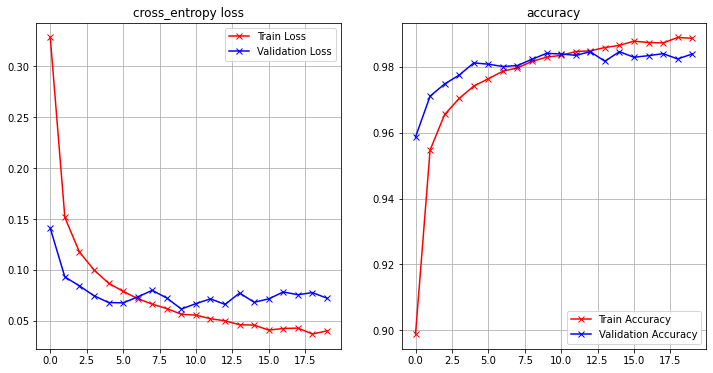

In [21]:
plot_loss_accuracy(history_2)

## Think about the following questions

1) How do model_1 and model_2 compare? Which do you prefer? If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model? How do they compare? What does that suggest about each model? Do the same for accuracy? Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model. Try it out below? Did it improve the performance?

**Answers**
1. Both Model_1 and Model_2 exhibit low error rates and high accuracy, which are desirable characteristics in a model. However, Model_2 has a higher number of parameters. This aspect can be both advantageous or detrimental, depending on the model's ability to generalize effectively to unseen data. In this case, Model_2 slightly outperforms Model_1, showing higher accuracy and lower error. This suggests that the additional parameters allow Model_2 to capture more complex patterns in the data. Based on these results, Model_2 is preferred, especially if the generalization capacity is validated through further testing. Its superior performance makes it a better candidate for production deployment. However, additional experiments are recommended to ensure robustness.

2. When analyzing the trajectory of the loss function (cross-entropy loss) for both the training and test sets in Model_1, it becomes evident that overfitting begins to occur after the 19th epoch. This is observed in the loss graph, where the training loss continues to decrease, but the test loss either stabilizes or starts to increase. Interestingly, this behavior is not immediately apparent in the accuracy graph, as the accuracy remains relatively stable or shows minor fluctuations.

	This indicates that the loss function provides a more reliable signal for identifying when the training process should be halted. While accuracy is an essential metric for overall model evaluation, it can sometimes mask subtle issues like overfitting. Therefore, monitoring the loss function is critical for determining the optimal stopping point during training.

3. To improve one of the models, several changes can be considered. For instance, adjusting the learning rate could lead to smoother convergence and avoid overshooting the minimum of the loss function. Regularization techniques, such as L2 regularization or adding dropout layers, may also help reduce overfitting by constraining the complexity of the patterns learned by the model. Another effective strategy is implementing early stopping based on the validation loss, ensuring that training halts precisely when overfitting begins, thus preserving the model's generalization ability.

	Also, extending the number of epochs for Model_2 could leverage its superior capacity to learn complex patterns, potentially improving its performance further. Finally, if applicable, augmenting the training dataset could enhance the generalization capabilities of both models by introducing more diverse data points. Once these adjustments are implemented, their effectiveness can be evaluated by analyzing changes in the loss and accuracy metrics, focusing on improvements in test set performance and reductions in overfitting.

In [16]:
model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu' ),
    Dropout(0.2),
    Dense(128, activation='relu' ),
    Dropout(0.2),
    Dense(10, activation = "softmax")
])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)               

In [ ]:
model_3.compile(RMSprop(learning_rate = 0.001), "categorical_crossentropy", metrics=["accuracy"])
history_3 = model_3.fit(x_train, y_train, batch_size=128, epochs=30, verbose = 1, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 15s 19ms/step - loss: 0.4527 - accuracy: 0.8595 - val_loss: 0.1587 - val_accuracy: 0.9505
Epoch 2/30
469/469 [==============================] - 7s 16ms/step - loss: 0.2024 - accuracy: 0.9406 - val_loss: 0.1159 - val_accuracy: 0.9651
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1538 - accuracy: 0.9557 - val_loss: 0.1015 - val_accuracy: 0.9676
Epoch 4/30
469/469 [==============================] - 7s 15ms/step - loss: 0.1308 - accuracy: 0.9622 - val_loss: 0.1025 - val_accuracy: 0.9694
Epoch 5/30
469/469 [==============================] - 8s 16ms/step - loss: 0.1153 - accuracy: 0.9670 - val_loss: 0.0924 - val_accuracy: 0.9736
Epoch 6/30
469/469 [==============================] - 6s 14ms/step - loss: 0.1058 - accuracy: 0.9697 - val_loss: 0.0941 - val_accuracy: 0.9730
Epoch 7/30
469/469 [==============================] - 6s 14ms/step - loss: 0.0946 - accuracy: 0.9721 - val_loss: 0.0786 - val_accuracy: 0.976

NameError: name 'plot_loss_accuracy' is not defined

*ignore error, just compile above*

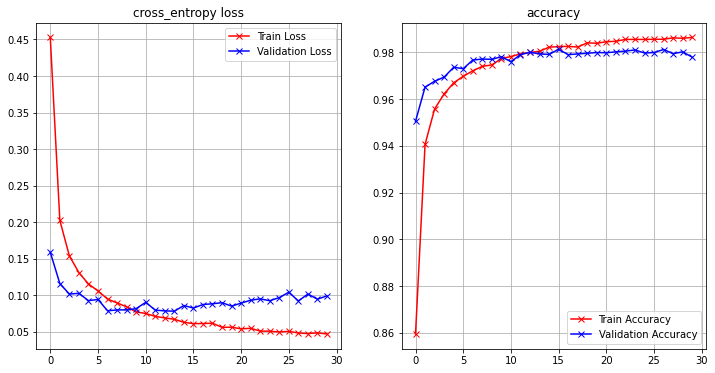

In [22]:
plot_loss_accuracy(history_3)

**Comment**
In this new model, changes were made to the neural network structure, adopting a convolutional style. This change resulted in an architecture with a reduced number of parameters compared to model 2. Despite this reduction, the new model managed to achieve a validation accuracy similar to that obtained by model 2, maintaining a good balance between performance and efficiency. In addition, the model presented a higher training accuracy than model 1, demonstrating its ability to learn more effectively on training data without compromising its generalization.